In [1]:
%pip install pandas
%pip install scikit-learn
%pip install webcolors

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Importing all the necessary libraries and modules to carry out color extrattion successfully:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import webbrowser
from sklearn.cluster import KMeans
from collections import Counter
import pandas as pd
from datetime import datetime

In [2]:
import webcolors
import webcolors
import numpy as np


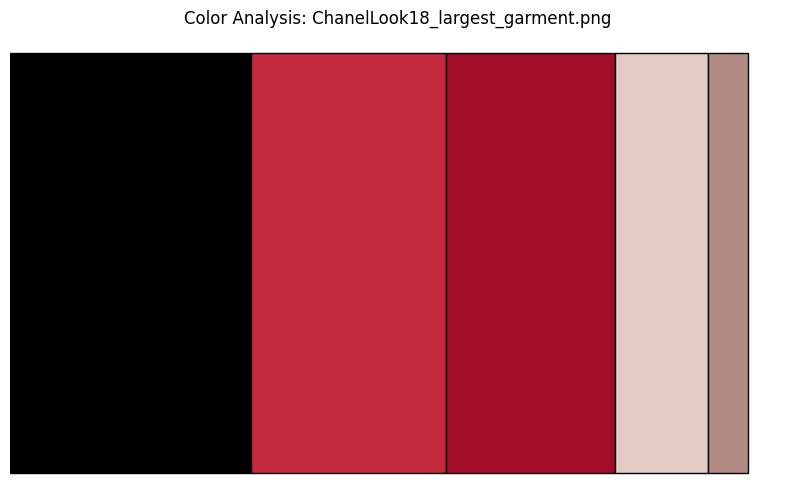

Processing: ChanelLook20_largest_garment.png
Processing: SchiaparelliLook32_largest_garment.png
Processing: ChanelLook39_largest_garment.png
Processing: ChanelLook21_largest_garment.png
Processing: SchiaperelliLook14_largest_garment.png
Processing: ChanelLook38_largest_garment.png
Processing: SchiaparelliLook33_largest_garment.png
Processing: JacquemusLook19_largest_garment.png
Processing: SchiaparelliLook30_largest_garment.png
Processing: SchiaparelliLook29_largest_garment.png
Processing: ChanelLook22_largest_garment.png
Processing: SchiaparelliLook31_largest_garment.png
Processing: JacquemusLook18_largest_garment.png
Processing: ChanelLook23_largest_garment.png
Processing: SchiaparelliLook28_largest_garment.png
Processing: SchiaperelliLook9_largest_garment.png
Processing: ChanelLook25_largest_garment.png
Processing: SchiaperelliLook8_largest_garment.png
Processing: SchiaperelliLook11_largest_garment.png
Processing: ChanelLook24_largest_garment.png
Processing: ChanelLook27_largest_gar

In [3]:
import os
import cv2
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from datetime import datetime


# Function to extract dominant colors from an image
def extract_colors(image_path, num_colors=5):
    """Extract dominant colors from an image using K-means clustering"""
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # Read with alpha channel
    if image is None:
        print(f"Error: Could not load image {image_path}")
        return None, None
    
    # If the image has an alpha channel (transparency), split it
    if image.shape[2] == 4:
        bgr_image = image[:, :, :3]  # BGR channels (ignore alpha for color extraction)
        alpha_channel = image[:, :, 3]  # Alpha channel (transparency)
        
        # Mask out transparent pixels
        mask = alpha_channel > 0  # Pixels where alpha is not zero
        
        # Only keep non-transparent pixels for color analysis
        bgr_image = bgr_image[mask]
    else:
        # No alpha channel (image is fully opaque)
        bgr_image = image
    
    # Resize image to speed up processing (optional)
    max_dim = 500  # Maximum dimension size
    h, w = bgr_image.shape[:2]
    if max(h, w) > max_dim:
        scale = max_dim / float(max(h, w))
        bgr_image = cv2.resize(bgr_image, (int(w * scale), int(h * scale)))
    
    # Convert to RGB for KMeans clustering
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    pixels = rgb_image.reshape(-1, 3)
    
    # Perform KMeans clustering
    clt = KMeans(n_clusters=num_colors, n_init=10, random_state=42)
    clt.fit(pixels)
    
    counter = Counter(clt.labels_)
    total_pixel_count = sum(counter.values())
    
    sorted_colors = []
    sorted_percentages = []
    for label, count in counter.most_common():
        sorted_colors.append(clt.cluster_centers_[label])
        sorted_percentages.append(count / total_pixel_count * 100)
    
    return sorted_colors, sorted_percentages

# Function to visualize colors through a plot
def visualize_colors(colors, percentages, image_name):
    """Create a horizontal bar chart of dominant colors"""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    start = 0
    for color, percentage in zip(colors, percentages):
        end = start + percentage
        rgb = [c/255 for c in color]
        ax.barh(0, percentage, left=start, color=rgb, edgecolor='black')
        start = end

    ax.axis('off')
    plt.title(f"Color Analysis: {image_name}")
    
    # Display the plot
    plt.show()

# Function to process a single image and display the results
def process_single_image(image_path, num_colors=5):
    """Process a single image and display results"""
    # Extracting colors and percentages
    colors, percentages = extract_colors(image_path, num_colors)
    if colors is None:
        return
    
    # Get the image name
    image_name = os.path.basename(image_path)
    
    # Display the color visualization instead of saving
    visualize_colors(colors, percentages, image_name)
    
    # Prepare the result data
    results = {
        'image': image_name,
        'colors': [f"#{int(c[0]):02x}{int(c[1]):02x}{int(c[2]):02x}" for c in colors],
        'percentages': percentages
    }
    
    return results

# Function to process all images in a folder and create a color summary report
def process_images_in_folder(folder_path, save_folder, num_colors=5):
    """Process all images in a folder and create a color summary report."""
    supported_ext = {'.jpg', '.jpeg', '.png', '.bmp'}
    image_paths = [
        os.path.join(folder_path, fname)
        for fname in os.listdir(folder_path)
        if os.path.splitext(fname)[1].lower() in supported_ext
    ]

    all_results = []
    color_counter = Counter()  # To track the frequency of each color
    total_images = 0  # To count the total number of images processed

    for img_path in image_paths:
        print(f"Processing: {os.path.basename(img_path)}")
        colors, percentages = extract_colors(img_path, num_colors)
        if colors is None:
            continue

        total_images += 1  # Increment total image counter
        image_name = os.path.basename(img_path)
        hex_colors = [
            f"#{int(c[0]):02x}{int(c[1]):02x}{int(c[2]):02x}" for c in colors
        ]

        for color, pct in zip(hex_colors, percentages):
            all_results.append({
                "image": image_name,
                "dominant color": color,
                "percentage": round(pct, 2)
            })
            color_counter[color] += 1  # Count each color occurrence

    if all_results:
        df = pd.DataFrame(all_results)
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        summary_file = os.path.join(save_folder, f"Color_Report_{timestamp}.csv")
        df.to_csv(summary_file, index=False)
        print(f"\n Color summary report saved to: {summary_file}")

        # Display total number of images processed
        print(f"\nTotal number of images processed: {total_images}")

        # Identify most unique colors (top N unique)
        most_common_colors = color_counter.most_common(10)  # Get top 10 most common colors
        print("\nTop 10 most common colors across all images:")
        for color, count in most_common_colors:
            print(f"{color}: {count} occurrences")
    else:
        print("No valid images were processed.")


# Example usage for a single image (interactive color palette)
image_path = "/Users/user/Desktop/Project Submission/Implementation/Source Code/Source Code/project 2/public/images/ProcessedRunwayImages/ChanelLook18_largest_garment.png"  # Path to the image
process_single_image(image_path, num_colors=5)

# Example usage for batch processing (color summary CSV for all images in a folder)
process_images_in_folder(
    folder_path="/Users/user/Desktop/Project Submission/Implementation/Source Code/Source Code/project 2/public/images/ProcessedRunwayImages",
    save_folder="/Users/user/Desktop/Color Percentage Report",
    num_colors=5
)
